In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC 
import seaborn as sns

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Data

In [50]:
geyser = pd.read_csv('geyser.csv')
chips = pd.read_csv('chips.csv')

In [51]:
geyser.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [52]:
set(geyser['class'])

{'N', 'P'}

In [53]:
geyser.head()

,x,y,class
0,1,4.4,N
1,1,3.9,N
2,1,4.0,P
3,1,4.0,N
4,1,3.5,N


In [54]:
chips.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [55]:
set(chips['class'])

{'N', 'P'}

In [56]:
chips.head()

,x,y,class
0,0.051267,0.69956,P
1,-0.092742,0.68494,P
2,-0.213710,0.69225,P
3,-0.375000,0.50219,P
4,-0.513250,0.46564,P


# Linear regression

## Convert

In [57]:
def convert(x):
    if x == "N":
        return -1
    else:
        return 1

geyser['class_num'] = geyser["class"].apply(convert)

In [58]:
geyser.head()

,x,y,class,class_num
0,1,4.4,N,-1
1,1,3.9,N,-1
2,1,4.0,P,1
3,1,4.0,N,-1
4,1,3.5,N,-1


In [59]:
geyser[["x", "y"]]

,x,y
0,1,4.4
1,1,3.9
2,1,4.0
3,1,4.0
4,1,3.5
...,...,...
217,23,2.1
218,23,4.2
219,23,2.1
220,23,5.2


## Train test split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(geyser[["x", "y"]], geyser["class_num"], test_size=0.3)

## Fit

In [188]:
lin = LinearRegression()

In [189]:
lin.fit(X_train, y_train)

LinearRegression()

## Score

In [190]:
def reconvert(x):
    if x < 0:
        return "N"
    else:
        return "P"


In [191]:
pd.Series(lin.predict(X_test)).apply(reconvert)

0     N
1     N
2     N
3     N
4     N
     ..
62    N
63    P
64    N
65    P
66    N
Length: 67, dtype: object

In [192]:
y_test.apply(reconvert)

211    N
119    N
85     N
196    N
13     N
      ..
205    N
132    P
42     P
84     P
108    N
Name: class_num, Length: 67, dtype: object

In [193]:
f1_score(y_test.apply(reconvert),
         pd.Series(lin.predict(X_test)).apply(reconvert), pos_label='P')

0.851063829787234

In [194]:
lin.coef_

array([ 0.01219838, -0.72833861])

# SVM

In [195]:
# custom function for scoring
def my_f1_svc(y_true, y_pred):
    return f1_score(y_true.apply(reconvert),
                    pd.Series(y_pred).apply(reconvert), pos_label='P')

my_f1_svc_score = make_scorer(my_f1_svc)

## geyser

### rbf

In [196]:
param_grid = {
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [197]:
clf = SVC(kernel='rbf')
grid_search = GridSearchCV(clf, param_grid, n_jobs=10, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [198]:
geyser_rbf = my_f1_svc(y_test,
         grid_search.predict(X_test))
geyser_rbf

0.8260869565217391

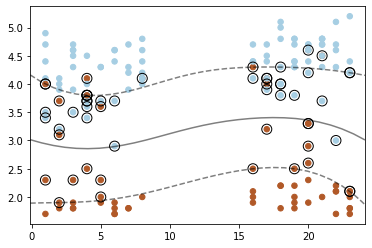

In [207]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=10, degree=0, gamma=0.01)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

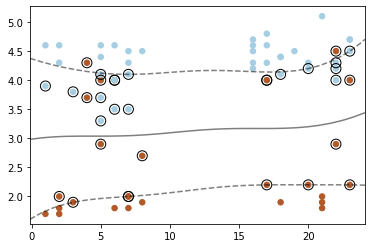

In [208]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=10, degree=0, gamma=0.01)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### linear

In [209]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [210]:
clf = SVC(kernel='linear')
grid_search = GridSearchCV(clf, param_grid, n_jobs=10, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.5}

In [211]:
geyser_lin = my_f1_svc(y_test,
         grid_search.predict(X_test))
geyser_lin

0.851063829787234

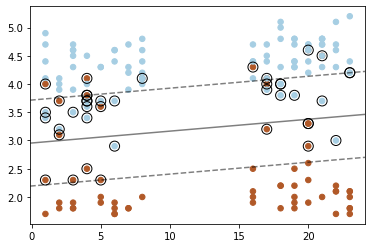

In [212]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.5, degree=0, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

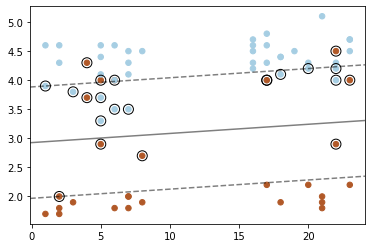

In [213]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.5, degree=0, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### poly

In [176]:
param_grid = {
    'degree': [1, 2, 3],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [177]:
clf = SVC(kernel='poly')
grid_search = GridSearchCV(clf, param_grid, n_jobs=12, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 1}

In [178]:
my_f1_svc(y_test,
         grid_search.predict(X_test))

0.84

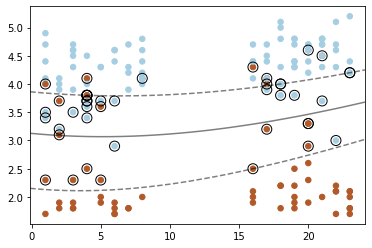

In [214]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='poly', C=0.01, degree=2, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

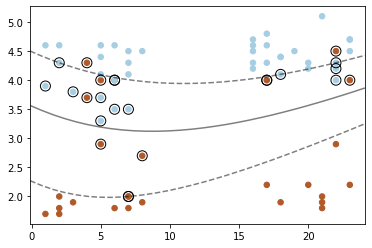

In [215]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='poly', C=0.01, degree=2, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### sigmoid

In [216]:
param_grid = {
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [217]:
clf = SVC(kernel='sigmoid')
grid_search = GridSearchCV(clf, param_grid, n_jobs=12, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [218]:
my_f1_svc(y_test,
         grid_search.predict(X_test))

0.8260869565217391

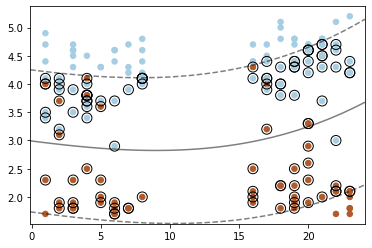

In [219]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='sigmoid', C=10, degree=2, gamma=0.001)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

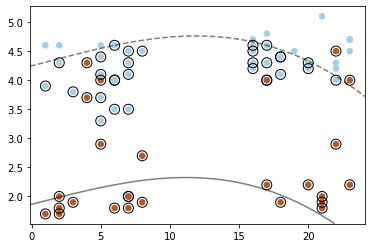

In [220]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='sigmoid', C=10, degree=2, gamma=0.001)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## chips

In [221]:
chips['class_num'] = chips["class"].apply(convert)

In [222]:
chips

,x,y,class,class_num
0,0.051267,0.699560,P,1
1,-0.092742,0.684940,P,1
2,-0.213710,0.692250,P,1
3,-0.375000,0.502190,P,1
4,-0.513250,0.465640,P,1
...,...,...,...,...
113,-0.720620,0.538740,N,-1
114,-0.593890,0.494880,N,-1
115,-0.484450,0.999270,N,-1
116,-0.006336,0.999270,N,-1


In [223]:
X_train, X_test, y_train, y_test = train_test_split(chips[["x", "y"]], chips["class_num"], test_size=0.3)

### linear regression

In [224]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [225]:
f1_score(y_test.apply(reconvert),
         pd.Series(lin.predict(X_test)).apply(reconvert), pos_label='P')

0.5128205128205129

In [226]:
lin.coef_

array([0.01416767, 0.17645256])

### rbf

In [227]:
param_grid = {
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [228]:
clf = SVC(kernel='rbf')
grid_search = GridSearchCV(clf, param_grid, n_jobs=10, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 1}

In [229]:
geyser_rbf = my_f1_svc(y_test,
         grid_search.predict(X_test))
geyser_rbf

0.8484848484848485

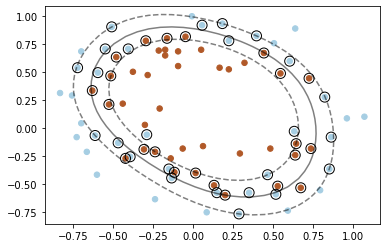

In [231]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=10, degree=0, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

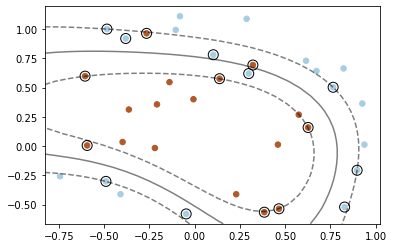

In [232]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=10, degree=0, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### linear

In [233]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [234]:
clf = SVC(kernel='linear')
grid_search = GridSearchCV(clf, param_grid, n_jobs=10, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.01}

In [235]:
geyser_lin = my_f1_svc(y_test,
         grid_search.predict(X_test))
geyser_lin

0.6190476190476191

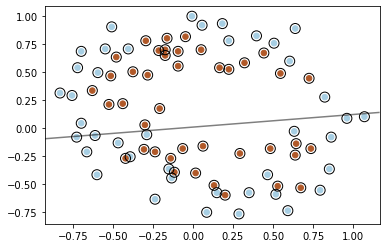

In [237]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.01, degree=0, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

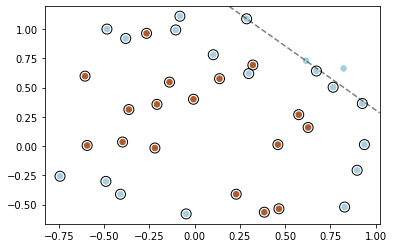

In [238]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.01, degree=0, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### poly

In [249]:
param_grid = {
    'degree': [1, 2, 3, 4, 5],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [250]:
clf = SVC(kernel='poly')
grid_search = GridSearchCV(clf, param_grid, n_jobs=12, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'degree': 2, 'gamma': 1}

In [241]:
my_f1_svc(y_test,
         grid_search.predict(X_test))

0.7058823529411765

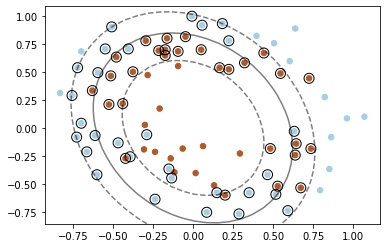

In [242]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='poly', C=10, degree=2, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

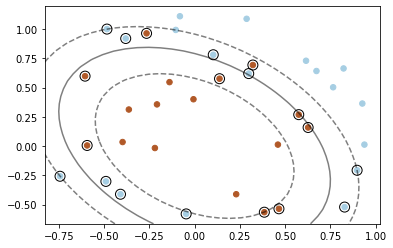

In [243]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='poly', C=10, degree=2, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

### sigmoid

In [244]:
param_grid = {
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [245]:
clf = SVC(kernel='sigmoid')
grid_search = GridSearchCV(clf, param_grid, n_jobs=12, scoring=my_f1_svc_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'gamma': 1}

In [246]:
my_f1_svc(y_test,
         grid_search.predict(X_test))

0.6341463414634146

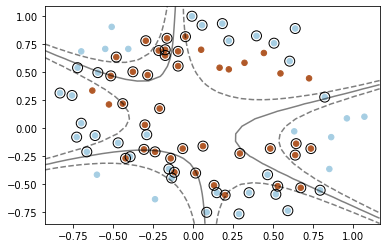

In [247]:
X, y = np.array(X_train), y_train

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='sigmoid', C=10, degree=2, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

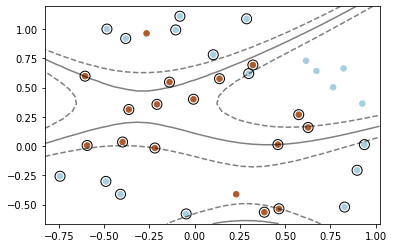

In [248]:
X, y = np.array(X_test), y_test

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='sigmoid', C=10, degree=2, gamma=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()